# Pymaceuticals Inc.
---

### Analysis

- The gender pie chart show that male and female mice are equally represented.
- Capomulin and Ramicane had the smallest tumor size
- Those two drugs also accounted for a higher mouse id and timepoint count
- The scatterplot showed that there is a relationship between tumor size and mouse size
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete_df = pd.merge(study_results, mouse_metadata, how = 'left', on=['Mouse ID'])

# Display the data table for preview
study_data_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_meta_count = mouse_metadata['Mouse ID'].nunique()
#mouse_meta_count
study_mouse_count = study_results['Mouse ID'].nunique()
#study_mouse_count
complete_mouse_count = study_data_complete_df['Mouse ID'].nunique()
complete_mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete_df.loc[study_data_complete_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
reduced_df = study_data_complete_df[study_data_complete_df['Mouse ID'].isin(duplicate_mice)==False]
reduced_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
check = reduced_df.loc[reduced_df['Mouse ID'] == 'g989',:]
check

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count = reduced_df['Mouse ID'].nunique()
mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = reduced_df['Tumor Volume (mm3)'].groupby(reduced_df['Drug Regimen']).mean()
median = reduced_df['Tumor Volume (mm3)'].groupby(reduced_df['Drug Regimen']).median()
var = reduced_df['Tumor Volume (mm3)'].groupby(reduced_df['Drug Regimen']).var()
std = reduced_df['Tumor Volume (mm3)'].groupby(reduced_df['Drug Regimen']).std()
sem = reduced_df['Tumor Volume (mm3)'].groupby(reduced_df['Drug Regimen']).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = reduced_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

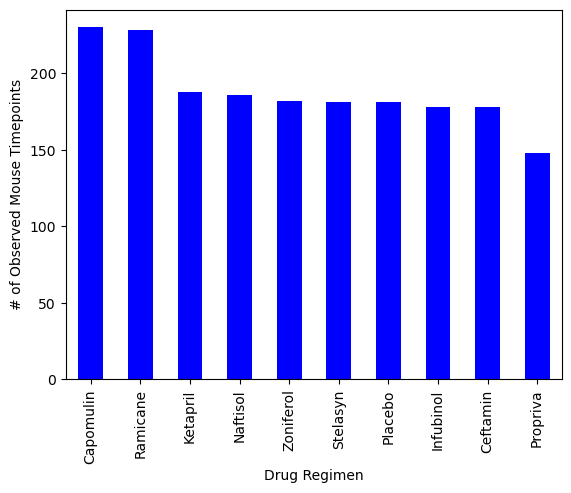

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count=reduced_df['Drug Regimen'].value_counts()
plot1 = count.plot(kind = 'bar', facecolor='blue', xlabel = 'Drug Regimen', ylabel = '# of Observed Mouse Timepoints')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

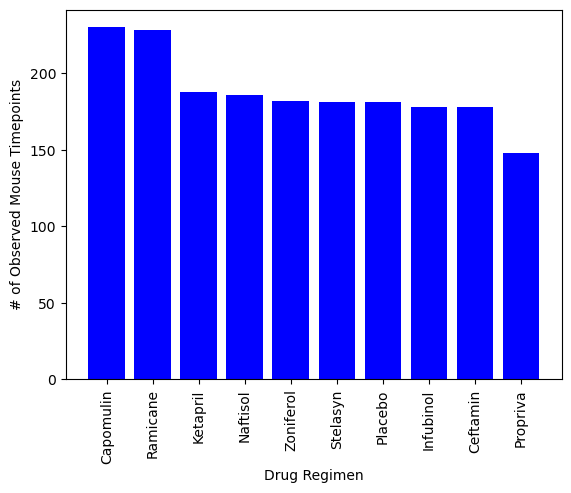

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = count.index.values
y_axis = count.values

plt.bar(x_axis,y_axis,color ='blue', align ='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")


<Axes: ylabel='Sex'>

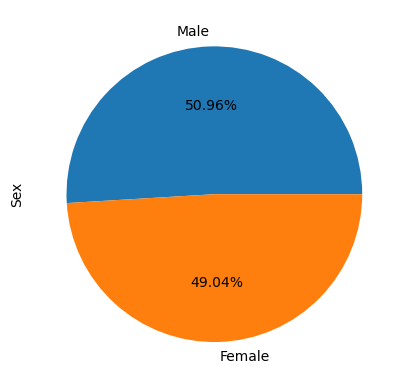

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = reduced_df["Sex"].value_counts()
gender_df.plot.pie(autopct = '%1.2f%%')


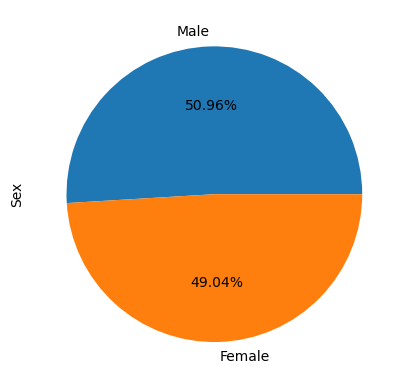

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot2 = gender_df.plot(kind = 'pie', y = reduced_df["Sex"].value_counts(), autopct = '%1.2f%%')

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_mouse = reduced_df.groupby('Mouse ID').max()['Timepoint']

## Filter the DataFrame to only include the four treatment regimens of interest

four_drugs = reduced_df[reduced_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_vol = pd.merge(last_mouse,reduced_df, on = ['Mouse ID','Timepoint'], how = 'left')
last_tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [25]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Put key treatments into a list for for loop (and later for plot labels)
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# For each drug in the key treatment list
for regimen in four_treatments:
    # Locate the rows which contain mice on this drug and get the tumor volumes
    tumor_volumes = last_tumor_vol.loc[last_tumor_vol['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    # add subset (series of tumor volumes) to the tumor volume list
    tumor_vol_list.append(tumor_volumes)
    # Calculate the IQR for the drug
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    
    # Determine outliers using upper and lower bounds, for the drug
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f'Summary statistics for {regimen}:')
    print(f'Number of mice: {len(tumor_volumes)}')
    print(f'Median tumor volume: {quartiles[0.5]}')
    print(f"Lower quartile: {q1}")
    print(f"Upper quartile: {q3}")
    print(f"IQR: {iqr}")
    print(f'Lower bound for outliers: {lower_bound}')
    print(f'Upper bound for outliers: {upper_bound}')
    print(f"Number of outliers: {len(outliers)}")

Summary statistics for Capomulin:
Number of mice: 25
Median tumor volume: 38.1251644
Lower quartile: 32.37735684
Upper quartile: 40.1592203
IQR: 7.781863460000004
Lower bound for outliers: 20.70456164999999
Upper bound for outliers: 51.83201549
Number of outliers: 0
Summary statistics for Ramicane:
Number of mice: 25
Median tumor volume: 36.56165229
Lower quartile: 31.56046955
Upper quartile: 40.65900627
IQR: 9.098536719999998
Lower bound for outliers: 17.912664470000003
Upper bound for outliers: 54.30681135
Number of outliers: 0
Summary statistics for Infubinol:
Number of mice: 25
Median tumor volume: 60.16518046
Lower quartile: 54.04860769
Upper quartile: 65.52574285
IQR: 11.477135160000003
Lower bound for outliers: 36.83290494999999
Upper bound for outliers: 82.74144559000001
Number of outliers: 1
Summary statistics for Ceftamin:
Number of mice: 25
Median tumor volume: 59.85195552
Lower quartile: 48.72207785
Upper quartile: 64.29983003
IQR: 15.577752179999997
Lower bound for outlier

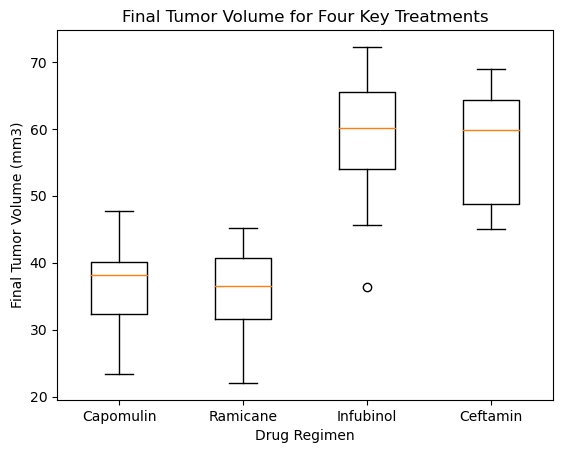

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_list, labels=four_treatments)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Final Tumor Volume for Four Key Treatments')
plt.show()

## Line and Scatter Plots

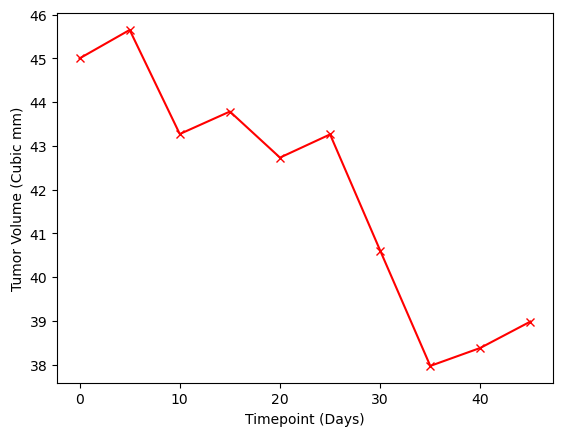

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = reduced_df.loc[reduced_df['Drug Regimen']=='Capomulin',:]
capomulin_mouse = capomulin_df.loc[capomulin_df['Mouse ID']=='b128',:]
#capomulin_mouse
x_axis = capomulin_mouse['Timepoint']
y_axis = capomulin_mouse['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis,marker='x',color='red')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (Cubic mm)')
plt.show()

/var/folders/zl/_5mslths5j5_p1rn650m4k900000gn/T/ipykernel_70838/1356141551.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_vol_capo = capomulin_df.groupby(['Mouse ID']).mean()


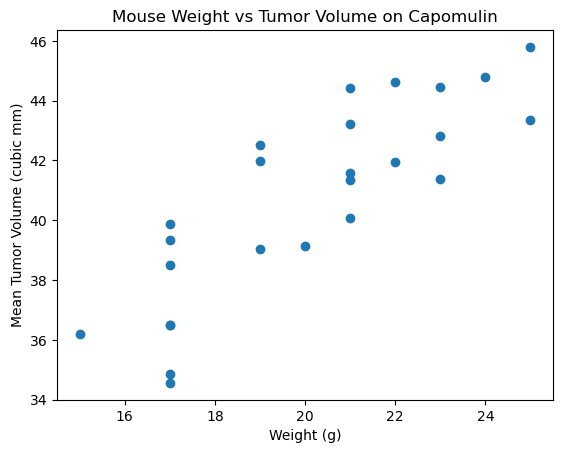

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_vol_capo = capomulin_df.groupby(['Mouse ID']).mean()
x_axis = avg_vol_capo['Weight (g)']
y_axis = avg_vol_capo['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Mean Tumor Volume (cubic mm)')
plt.title('Mouse Weight vs Tumor Volume on Capomulin')
plt.show()

In [30]:
# Calculate the correlation coefficient and a linear regression model 
print(f' The correlation coefficient is {x_axis.corr(y_axis)}.')

 The correlation coefficient is 0.8419363424694722.


## Correlation and Regression

/var/folders/zl/_5mslths5j5_p1rn650m4k900000gn/T/ipykernel_70838/811152604.py:9: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  line = st.stats.linregress(x_axis,y_axis)


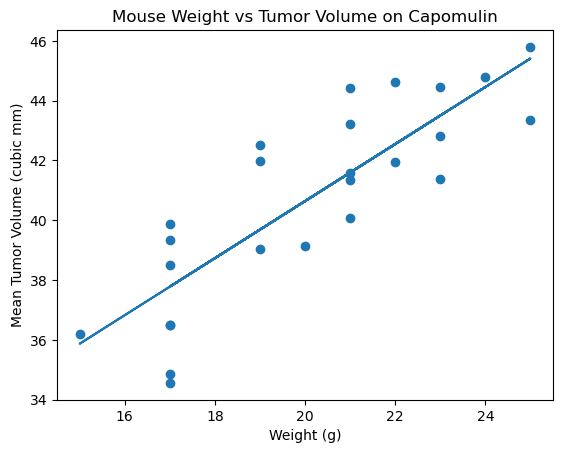

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_axis.corr(y_axis)
#y_axis.corr(x_axis)
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Mean Tumor Volume (cubic mm)')
plt.title('Mouse Weight vs Tumor Volume on Capomulin')
line = st.stats.linregress(x_axis,y_axis)

m=line.slope
b=line.intercept

plt.plot(x_axis, m*x_axis+b)